In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from ICMDP import *
import os
import pickle
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

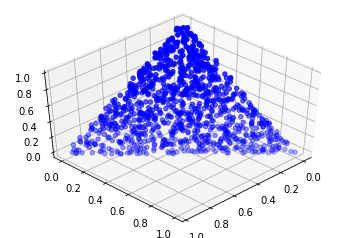

In [2]:
def get_random_context(n):
    # Uniform smapling from the standard n-1 simplex (which means vector of length n)
    # Based on https://cs.stackexchange.com/questions/3227/uniform-sampling-from-a-simplex answer by PKG
    x = np.random.exponential(scale=1.0, size=n)
    y = [x[0:i].sum()/x.sum() for i in range(len(x)+1)]
    z = [y[i]-y[i-1] for i in range(1,len(y))]
    return np.asarray(z)

def get_random_contexts(amount, n):
    contexts = []
    for i in range(amount):
        contexts.append(get_random_context(n))
    return np.asarray(contexts)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pts = get_random_contexts(1000, 3)
ax.scatter(pts[:,0], pts[:,1], pts[:,2], c='b')
ax.view_init(45, 45)
plt.show()

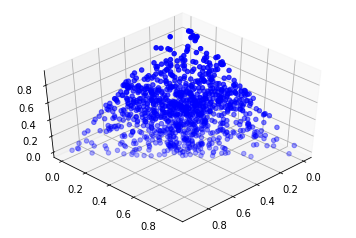

In [3]:
amount = 1000
contexts = []
for i in range(amount):
    c = np.random.uniform(0,1,3)
    c = c/c.sum()
    contexts.append(c)
contexts = np.asarray(contexts)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pts = get_random_contexts(1000, 3)
ax.scatter(contexts[:,0], contexts[:,1], contexts[:,2], c='b')
ax.view_init(45, 45)
plt.show()

In [4]:
#https://gist.github.com/mblondel/6f3b7aaad90606b98f71
def projection_simplex_sort(v):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - 1
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w

In [6]:
#Expand train sets
for i in range(1000):
    Conts = np.load("train_test_sets/train_set_"+str(i)+".npy")
    newConts = get_random_contexts(1900, 3)
    Conts = np.concatenate((Conts,newConts),axis=0)
    np.save("big_train_test_sets/train_set_"+str(i)+".npy", Conts)


In [5]:
#big train sets
for i in range(2000):
    newConts = get_random_contexts(2000, 5)
    np.save("big_train_test_sets/train_set_"+str(i)+".npy", newConts)


In [3]:
#test set
newConts = get_random_contexts(1000, 5)
np.save("big_train_test_sets/test_set.npy", newConts)
